In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('height-weight.csv')

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


<Axes: xlabel='Weight', ylabel='Height'>

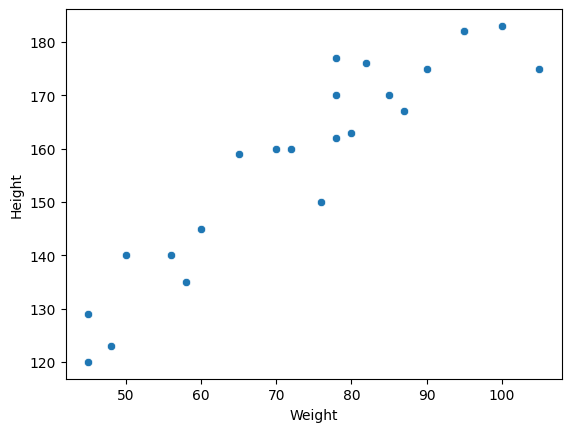

In [6]:
## Scatter plot
sns.scatterplot(x='Weight',y='Height',data=df)

In [7]:
## Correlation 
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


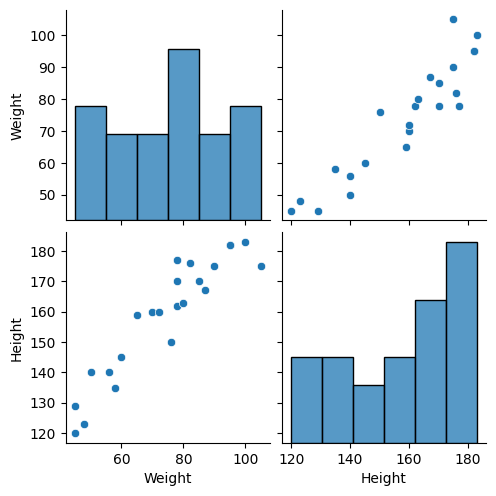

In [8]:
sns.pairplot(df)

In [9]:
## Independent and Dependent variables

X = df[['Weight']] ## Independent should be a dataframe or 2 dimensional array
np.array(X).shape
y = df['Height'] ## This variable can be is series or 1 dimensional array

In [10]:
## Do not do this
X_series = df['Weight']
np.array(X_series).shape

(23,)

In [11]:
## train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(6, 1)
(17,)
(6,)


## Standardization

#### In Z-score : mean = 0 and standard deviation = 1

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test) 
## transform is used only to prevent data leakage. It does not calculate the mean and standard deviation of the test data such as fit_transform

### Apply Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regression = LinearRegression(n_jobs=-1)

In [18]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [19]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


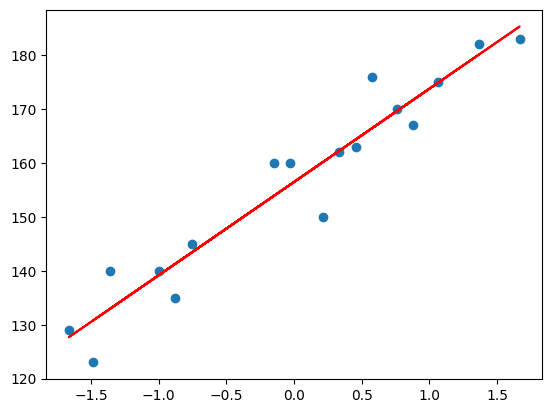

In [20]:
## Plot Training data best fit line

plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color='red')

###  Prediction for test data
1. predicted height output = intercept_ + coef_(Weights)
2. y_pred = 156.470 + 17.29(X_test)

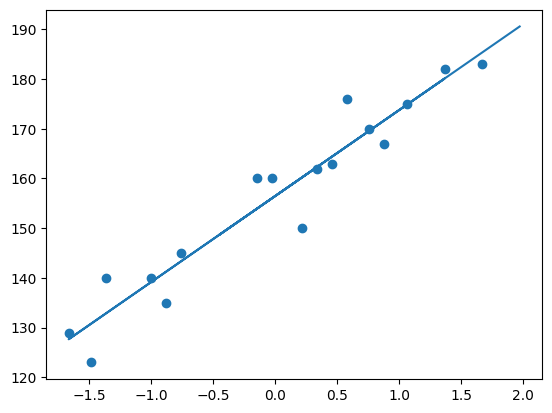

In [21]:
## Prediction for test data
y_pred = regression.predict(X_test)
plt.scatter(X_train, y_train)
plt.plot(X_test,y_pred)

In [22]:
## Performance matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

In [23]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


### R Square
Formula
    R_squared = 1 - (SSR / SST)

R^2 = Coefficient of determination SSR = sum of squares of residual SST = total sum of squares

In [24]:
from sklearn.metrics import r2_score

In [25]:
score = r2_score(y_test,y_pred)
score

0.7360826717981276

###Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]
####where
R2 = The R2 of model n : The number of observations k =. The number of predictor variables

In [26]:
## display adjusted R2 Score

adj_r2 = 1 - ((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
adj_r2

0.6701033397476595

In [27]:
## OLS Technique
import statsmodels.api as sm 

In [28]:
model = sm.OLS(y_train,X_train).fit()

In [29]:
predict = model.predict(X_test)
print(predict)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [30]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 27 Feb 2025   Prob (F-statistic):                       0.664
Time:                        01:02:02   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\sanga\Desktop\pythonU\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [35]:
## Predict for new data
regression.predict(scaler.transform([[72]]))

c:\Users\sanga\Desktop\pythonU\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])